#Imports

In [1]:
import matplotlib as plt
import matplotlib.pyplot as pt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Loading the dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
rows, cols = 28, 28

In [3]:
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
input_shape = (rows, cols, 1)

#Visualising the Dataset

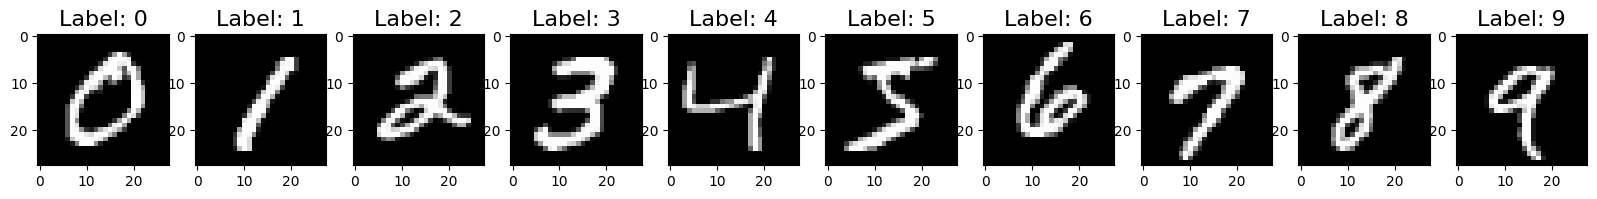

In [4]:
num_classes = 10
f, ax = pt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

#Preprocessing the data

a). Normalization

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

b). One hot encoding

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Building the model

In [7]:
model = tf.keras.Sequential()

def build_lenet(input_shape):

  #Convolution layer 1
  model.add(tf.keras.layers.Conv2D(filters = 6,
                                   kernel_size = (5,5),
                                   strides = (1,1),
                                   activation = 'tanh',
                                   input_shape = input_shape))
  
  #Subsampling layer 1
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                             strides = (2,2)))
  
  #Convolution layer 2
  model.add(tf.keras.layers.Conv2D(filters = 16,
                                   kernel_size = (5,5),
                                   strides = (1,1),
                                   activation = 'tanh'))
  
  #Subsampling layer 2
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                             strides = (2,2)))
  
  #Flattening layer
  model.add(tf.keras.layers.Flatten())

  #Fully connected layer 1
  model.add(tf.keras.layers.Dense(units = 120, activation = 'tanh'))

  #Flattening layer
  model.add(tf.keras.layers.Flatten())

  #Fully connected layer 2
  model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))

  #Output layer
  model.add(tf.keras.layers.Dense( units = 10, activation = 'softmax'))

  #Compile the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), metrics = ['accuracy'])

  #Summarizing the model
  model.summary()

  return model

In [8]:
lenet = build_lenet(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

#Training the model

In [9]:
epochs = 50

In [10]:
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 128,
                    verbose = 1)

Epoch 1/50
469/469 [==============================] - 26s 55ms/step - loss: 1.3731 - accuracy: 0.6169
Epoch 2/50
469/469 [==============================] - 26s 54ms/step - loss: 0.5406 - accuracy: 0.8621
Epoch 3/50
469/469 [==============================] - 28s 59ms/step - loss: 0.4069 - accuracy: 0.8890
Epoch 4/50
469/469 [==============================] - 26s 55ms/step - loss: 0.3465 - accuracy: 0.9027
Epoch 5/50
469/469 [==============================] - 26s 55ms/step - loss: 0.3075 - accuracy: 0.9122
Epoch 6/50
469/469 [==============================] - 26s 55ms/step - loss: 0.2777 - accuracy: 0.9207
Epoch 7/50
469/469 [==============================] - 26s 55ms/step - loss: 0.2536 - accuracy: 0.9266
Epoch 8/50
469/469 [==============================] - 25s 53ms/step - loss: 0.2333 - accuracy: 0.9322
Epoch 9/50
469/469 [==============================] - 25s 53ms/step - loss: 0.2157 - accuracy: 0.9367
Epoch 10/50
469/469 [==============================] - 26s 55ms/step - loss: 0.200

#Testing the model

In [11]:
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ', acc)

313/313 [==============================] - 3s 7ms/step - loss: 0.0536 - accuracy: 0.9825
ACCURACY:  0.9825000166893005


In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 2s 7ms/step
[[6.46550234e-06 1.19042925e-05 6.73637987e-05 ... 9.99728322e-01
  7.83647863e-07 3.44314321e-05]
 [9.34149284e-05 1.95509143e-04 9.99536812e-01 ... 1.47651434e-07
  2.52030495e-05 2.97367855e-08]
 [5.77864557e-05 9.99136806e-01 1.35365990e-04 ... 8.01719434e-05
  2.19497655e-04 1.46780758e-05]
 ...
 [2.02447336e-06 3.56211649e-06 3.64930827e-07 ... 8.06632670e-05
  5.37688429e-05 1.05070874e-04]
 [4.01313191e-05 4.43914287e-05 2.44451303e-06 ... 3.71333340e-06
  4.47710510e-03 2.42296483e-06]
 [8.05972086e-04 2.29484135e-06 9.94985458e-04 ... 1.80846655e-07
  7.53116838e-05 9.15050532e-06]]
[7 2 1 ... 4 5 6]


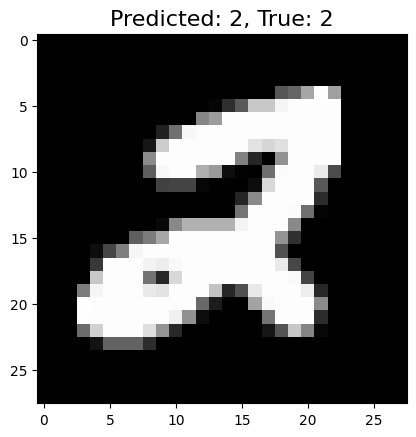

In [13]:
# Visualize for one example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

pt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
pt.imshow(x_sample.reshape(28, 28), cmap='gray')

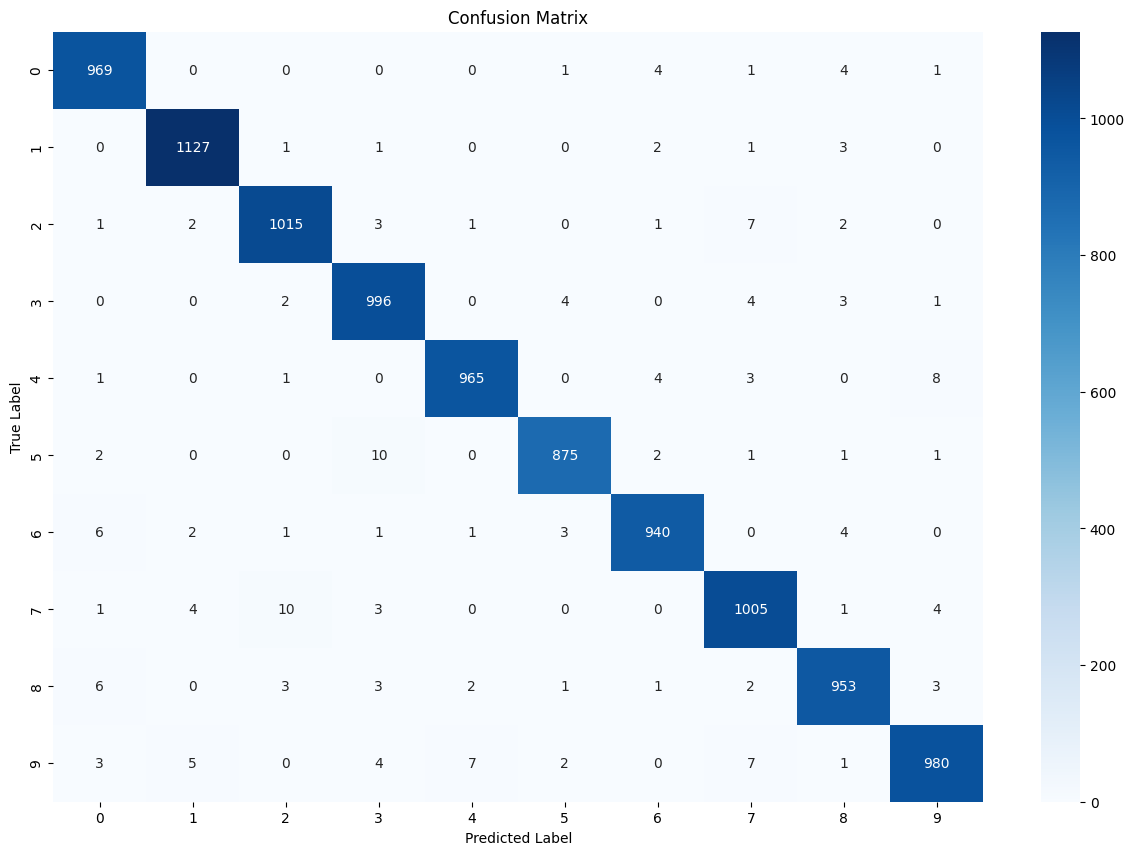

In [14]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = pt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#Tranformation/Reshaping into 28x28 pixel

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
print("Training Data ", x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print("Testing Data ", x_train.shape, y_train.shape)

Training Data  (60000, 28, 28) (60000, 10)
Testing Data  (60000, 28, 28) (60000, 10)
